In [143]:
import numpy as np
import math
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import (
    array_to_latex,
    plot_histogram,
    plot_bloch_vector,
    plot_bloch_multivector
)
from qiskit_aer import Aer, AerSimulator
from IPython.display import display, Math

def get_coefficients(qc):
    state = Statevector.from_instruction(qc.remove_final_measurements(inplace=False))
    num_qubits = qc.num_qubits
    coefficients = state.data
    for i, amplitude in enumerate(coefficients):
        binary_index = format(i, f'0{num_qubits}b')
        print(f"Coefficient of |{binary_index}⟩: {amplitude}")

def simulate_with_shots(qc, shots):
    qc.measure_all()
    simulator = AerSimulator()
    result = simulator.run(qc, shots=shots).result()
    counts = result.get_counts(qc)
    print(f"Результаты измерений для {shots} выполнений:", counts)

# Задание 1

Coefficient of |0⟩: (0.7071067811865475+0j)
Coefficient of |1⟩: (0.7071067811865475+0j)


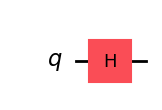

In [144]:
qc_1 = QuantumCircuit(1)
qc_1.h(0)
get_coefficients(qc_1)
qc_1.draw(output='mpl')

# Задание 2

Coefficient of |0⟩: (0.7071067811865475+0j)
Coefficient of |1⟩: (-0.7071067811865475+0j)


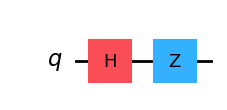

In [145]:
qc_2 = QuantumCircuit(1)
qc_2.h(0)
qc_2.z(0)
get_coefficients(qc_2)
qc_2.draw(output='mpl')

Coefficient of |0⟩: (0.7071067811865475+0j)
Coefficient of |1⟩: (-0.7071067811865475+0j)


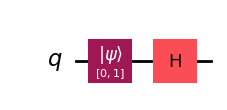

In [146]:
qc_2 = QuantumCircuit(1)
qc_2.initialize([0, 1], 0)
qc_2.h(0)
get_coefficients(qc_2)
qc_2.draw(output='mpl')

# Задание 3

Coefficient of |0⟩: (-0.7071067811865475+0j)
Coefficient of |1⟩: (0.7071067811865475+0j)


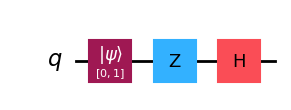

In [147]:
qc_3 = QuantumCircuit(1)
qc_3.initialize([0, 1], 0)
qc_3.z(0)
qc_3.h(0)
get_coefficients(qc_3)
qc_3.draw(output='mpl')

In [148]:
import json
with open('cfg_2.json', 'r') as file:
    probabilities = json.load(file)

P_0 = probabilities['a']
P_1 = probabilities['b']

a = np.sqrt(P_0 / 100)
b = np.sqrt(P_1 / 100)
print (f"Coefficient of a: {a}")
print (f"Coefficient of b: {b}") # Так конечно не совсем корректно. Зато будет наглядно, если хотя бы даже мнимая часть будет схожа с этими коэффициентами

Coefficient of a: 0.6708203932499369
Coefficient of b: 0.7416198487095663


# Задание 4
Вентиль RX поворачивает состояние кубита вокруг оси X на угол $\theta$, что позволяет получить нужные амплитуды. По условию нормировки

In [149]:
theta = 2 * np.arccos(a)
qc_4 = QuantumCircuit(1)
qc_4.rx(-theta, 0)
get_coefficients(qc_4)
simulate_with_shots(qc_4, 1000)

Coefficient of |0⟩: (0.6708203932499369+0j)
Coefficient of |1⟩: 0.7416198487095663j
Результаты измерений для 1000 выполнений: {'0': 447, '1': 553}


# Задание 5
Вентиль RY поворачивает состояние кубита вокруг оси Y на угол $\theta$, что позволяет получить нужные амплитуды. Логика такая же, как и в задании 4

In [150]:
theta = 2 * np.arcsin(b)
qc_5 = QuantumCircuit(1)
qc_5.ry(theta, 0)
get_coefficients(qc_5)
simulate_with_shots(qc_5, 1000)

Coefficient of |0⟩: (0.6708203932499368+0j)
Coefficient of |1⟩: (0.7416198487095663+0j)
Результаты измерений для 1000 выполнений: {'1': 567, '0': 433}


# Задание 6
Вентиль U может в принципе задать любую суперпозицию состояний, принимает в себя три параметра

- theta (θ) - угол поворота вокруг оси X
- phi (φ) - угол поворота вокруг оси Z перед поворотом на θ
- lambda (λ) - угол поворота вокруг оси Z после поворота на θ

In [151]:
theta = 2 * np.arccos(a)
qc_6 = QuantumCircuit(1)
qc_6.u(theta, 0, 0, 0)
get_coefficients(qc_6)
simulate_with_shots(qc_6, 1000)

Coefficient of |0⟩: (0.6708203932499369+0j)
Coefficient of |1⟩: (0.7416198487095663+0j)
Результаты измерений для 1000 выполнений: {'0': 459, '1': 541}


# Задание 7

In [152]:
theta = 2 * np.arccos(a)
qc_7 = QuantumCircuit(1)
qc_7.rx(theta, 0)
get_coefficients(qc_7)
simulate_with_shots(qc_7, 1000)

Coefficient of |0⟩: (0.6708203932499369+0j)
Coefficient of |1⟩: -0.7416198487095663j
Результаты измерений для 1000 выполнений: {'1': 561, '0': 439}


# Задание 8

In [153]:
theta = 2 * np.arcsin(b)
qc_9 = QuantumCircuit(1)
qc_9.ry(-theta, 0)
get_coefficients(qc_9)
simulate_with_shots(qc_9, 1000)

Coefficient of |0⟩: (0.6708203932499368+0j)
Coefficient of |1⟩: (-0.7416198487095663+0j)
Результаты измерений для 1000 выполнений: {'0': 429, '1': 571}


# Задание 9

In [154]:
theta = 2 * np.arccos(a)
qc_9 = QuantumCircuit(1)
qc_9.u(-theta, 0, 0, 0)
get_coefficients(qc_9)
simulate_with_shots(qc_9, 1000)

Coefficient of |0⟩: (0.6708203932499369+0j)
Coefficient of |1⟩: (-0.7416198487095663+0j)
Результаты измерений для 1000 выполнений: {'0': 435, '1': 565}


# Задание 10
Применим вентиль поворота $R_Y$, как делали ранее

In [155]:
theta = 2 * np.arcsin(b)
qc_10 = QuantumCircuit(1)
qc_10.ry(theta, 0)
get_coefficients(qc_10)
simulate_with_shots(qc_10, 1000)

Coefficient of |0⟩: (0.6708203932499368+0j)
Coefficient of |1⟩: (0.7416198487095663+0j)
Результаты измерений для 1000 выполнений: {'1': 543, '0': 457}


# Задание 11

Если посмотрим на сферу Блоха, то увидим, что гейт Адамара повернул его на Pi. После применения Hadamard-вентиля, состояние кубита будет: $ [ \frac{1}{\sqrt{2}}(\cos(\theta/2) - i\sin(\theta/2)) |0⟩ + \frac{1}{\sqrt{2}}(\cos(\theta/2) + i\sin(\theta/2)) |1⟩ ]$

In [156]:
theta = 2 * np.arccos(a)
qc_11 = QuantumCircuit(1)
qc_11.rx(-theta, 0)
get_coefficients(qc_11)

qc_11_2 = QuantumCircuit(1, 1)
qc_11_2.rx(-theta, 0)
qc_11_2.h(0)
get_coefficients(qc_11_2)

Coefficient of |0⟩: (0.6708203932499369+0j)
Coefficient of |1⟩: 0.7416198487095663j
Coefficient of |0⟩: (0.4743416490252569+0.5244044240850757j)
Coefficient of |1⟩: (0.4743416490252569-0.5244044240850757j)


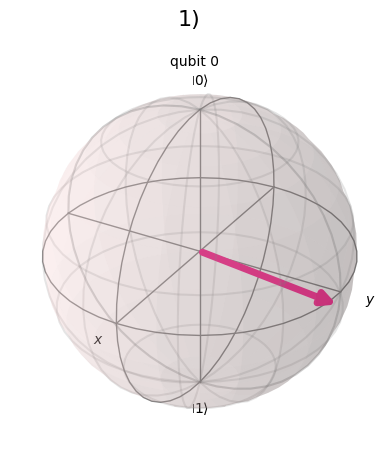

In [157]:
state_1 = Statevector.from_instruction(qc_11)
plot_bloch_multivector(state_1, title='1)')

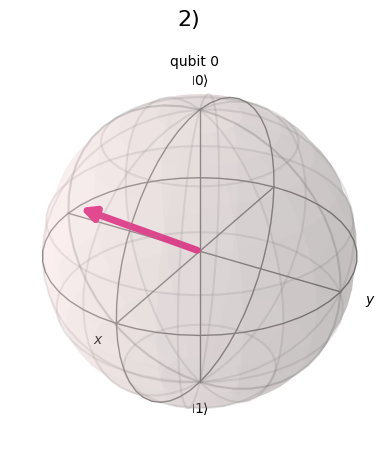

In [158]:
state_2 = Statevector.from_instruction(qc_11_2)
plot_bloch_multivector(state_2, title='2)')

# Задание 12
После вращения вокруг оси X применяются два Hadamard-вентиля, которые в совокупности не изменяют состояние кубита, полученное после RX. Это связано с тем, что два последовательных Hadamard-вентиля эквивалентны операции тождества (Identity), то есть они возвращают кубит в состояние, в котором он был до применения Hadamard-вентилей.

In [159]:
theta = 2 * np.arccos(a)
qc_12 = QuantumCircuit(1)
qc_12.rx(-theta, 0)
get_coefficients(qc_12)

qc_12_2 = QuantumCircuit(1, 1)
qc_12_2.rx(-theta, 0)
qc_12_2.h(0)
qc_12_2.h(0)
get_coefficients(qc_12_2)

Coefficient of |0⟩: (0.6708203932499369+0j)
Coefficient of |1⟩: 0.7416198487095663j
Coefficient of |0⟩: (0.6708203932499368+0j)
Coefficient of |1⟩: 0.7416198487095661j


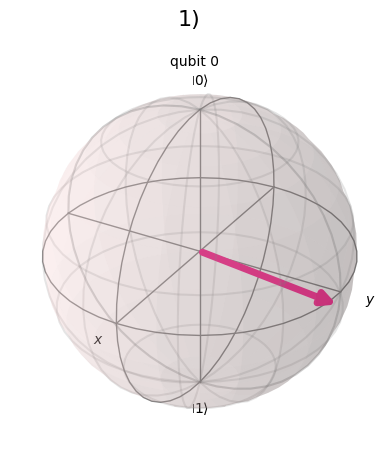

In [160]:
state_1 = Statevector.from_instruction(qc_12)
plot_bloch_multivector(state_1, title='1)')

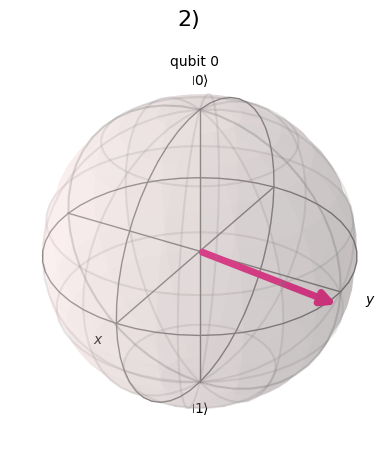

In [161]:
state_2 = Statevector.from_instruction(qc_12_2)
plot_bloch_multivector(state_2, title='2)')

# Задание 13.а

Coefficient of |0⟩: (0.7071067811865475+0j)
Coefficient of |1⟩: (0.7071067811865475+0j)
Результаты измерений для 1000 выполнений: {'0 0': 481, '1 0': 519}


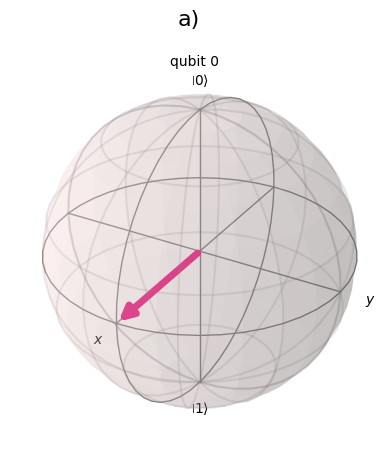

In [162]:
qc_13_a = QuantumCircuit(1, 1)
qc_13_a.h(0)
get_coefficients(qc_13_a)
simulate_with_shots(qc_13_a, 1000)

state_a = Statevector.from_instruction(qc_13_a.remove_final_measurements(inplace=False))
plot_bloch_multivector(state_a, title='a)')

# Задание 13.b

Coefficient of |0⟩: (0.7071067811865475+0j)
Coefficient of |1⟩: (-0.7071067811865475+0j)
Результаты измерений для 1000 выполнений: {'1 0': 515, '0 0': 485}


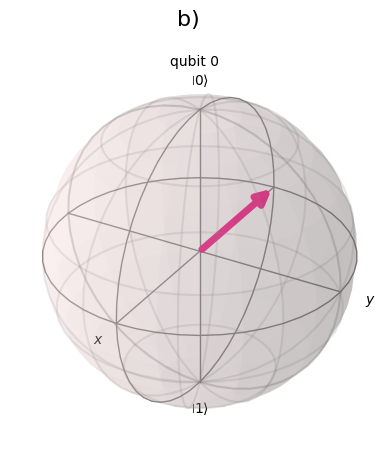

In [163]:
qc_13_b = QuantumCircuit(1, 1)
qc_13_b.x(0)
qc_13_b.h(0)
get_coefficients(qc_13_b)
simulate_with_shots(qc_13_b, 1000)

state_b = Statevector.from_instruction(qc_13_b.remove_final_measurements(inplace=False))
plot_bloch_multivector(state_b, title='b)')

# Задание 13.c 
Вентиль Z поворачивает на сфере Блоха на $\pi$. Далее, получаем, что |1> станет отрицательным, т.к. через формулу Эйлера выйдем на $-1$

Coefficient of |0⟩: (0.7071067811865475+0j)
Coefficient of |1⟩: (-0.7071067811865475+0j)
Результаты измерений для 1000 выполнений: {'0 0': 505, '1 0': 495}


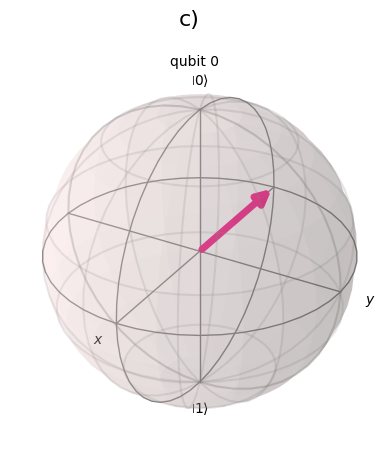

In [164]:
qc_13_c = QuantumCircuit(1, 1)
qc_13_c.h(0)
qc_13_c.z(0)
get_coefficients(qc_13_c)
simulate_with_shots(qc_13_c, 1000)

state_c = Statevector.from_instruction(qc_13_c.remove_final_measurements(inplace=False))
plot_bloch_multivector(state_c, title='c)')

# Задание 14.a
Оба кубита в суперпозиции

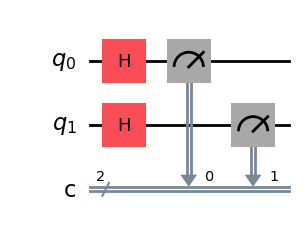

In [165]:
qc_14_a = QuantumCircuit(2, 2)
qc_14_a.h(0)
qc_14_a.h(1)
qc_14_a.measure(0, 0)
qc_14_a.measure(1, 1)
qc_14_a.draw(output='mpl')

In [166]:
get_coefficients(qc_14_a)
simulate_with_shots(qc_14_a, 1000)

Coefficient of |00⟩: (0.4999999999999999+0j)
Coefficient of |01⟩: (0.4999999999999999+0j)
Coefficient of |10⟩: (0.4999999999999999+0j)
Coefficient of |11⟩: (0.4999999999999999+0j)
Результаты измерений для 1000 выполнений: {'01 01': 255, '10 10': 242, '11 11': 269, '00 00': 234}


# Задание 14.b
Перевернули состояние кубита с 0 на 1. И перевели в суперпозицию

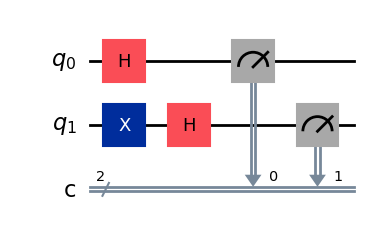

In [167]:
qc_14_b = QuantumCircuit(2, 2)
qc_14_b.h(0)
qc_14_b.x(1)
qc_14_b.h(1)
qc_14_b.measure(0, 0)
qc_14_b.measure(1, 1)
qc_14_b.draw(output='mpl')

In [168]:
get_coefficients(qc_14_b)
simulate_with_shots(qc_14_b, 1000)

Coefficient of |00⟩: (0.4999999999999999+0j)
Coefficient of |01⟩: (0.4999999999999999+0j)
Coefficient of |10⟩: (-0.4999999999999999+0j)
Coefficient of |11⟩: (-0.4999999999999999+0j)
Результаты измерений для 1000 выполнений: {'00 00': 249, '11 11': 257, '10 10': 252, '01 01': 242}
